### Osnovni statisticki alati u Pythonu

In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

#### Podaci
Primjeri ce biti radjeni koristenjem 1D podataka - niza brojeva koji npr. mogu biti mase (tezine) 7 osoba. 
Kako bi simulirali i slucajeve kada nisu dostupni svi podaci (mase svih osoba), napravit cemo dvije liste:
- x: koja sadrzi podatke za sve osobe
- y: kojoj na jednom mjestu nedostaje brojna vrijednost (umjesto broja stoji NaN vrijednost 'not a number')

In [13]:
x = [71, 95, 62, 65, 85, 90, 73]
y = [71, 95, 62, math.nan, 85, 90, 73]  #mogli smo koristiti i NumPy funkciju: np.nan)

In [14]:
math.isnan(x[3])

False

In [15]:
np.isnan(y[3])  #Ovdje testiram NumPy funkciju koja provjerava da li je neki broj NaN value.

True

Za koristenje podataka iz Pyhon liste u NumPy funkcijama, korisno je listu transformisati u vrstu NumPy vektora (np.array):

In [16]:
xx = np.array(x)
yy = np.array(y)

Jos jedna korisna biblioteka je Pandas, koja opet radi sa vlastitim tipom vektora (pd.Series), pa je, za kasnije primjere korisno kreirati i takav format podataka iz postojecih listi x i y:

In [17]:
xx_ = pd.Series(x)
yy_ = pd.Series(y)

Mozemo ispisati ove velicine:

In [18]:
print(xx)
print(yy)
print(type(xx))

[71 95 62 65 85 90 73]
[71. 95. 62. nan 85. 90. 73.]
<class 'numpy.ndarray'>


In [19]:
print(xx_)
print(yy_)
print(type(xx_))

0    71
1    95
2    62
3    65
4    85
5    90
6    73
dtype: int64
0    71.0
1    95.0
2    62.0
3     NaN
4    85.0
5    90.0
6    73.0
dtype: float64
<class 'pandas.core.series.Series'>


## Mjere centralne tendecije
#### Mean, median, mode...

#### 1. Srednja vrijednost - aritmeticka sredina

In [44]:
# Srednju vrijednost mozemo izracunati na sljedeci nacin
x = [71, 95, 62, 65, 85, 90, 73]
n = len(x)

mean_ = sum(x)/len(x)
print(mean_)

77.28571428571429


##### 1.1 Srednja vrijednost - Statics paket

In [46]:
mean_ = statistics.mean(x)
print(mean_)

77.28571428571429


In [47]:
mean_ = statistics.mean(y)
print(mean_)

nan


##### 1.2 Srednja vrijednost - NumPy

In [50]:
mean_ = np.mean(xx)
mean_

77.28571428571429

In [51]:
mean_ = np.mean(yy)
mean_

nan

##### 1.3 Srednja vrijednost - Pandas

In [53]:
mean_ = xx_.mean()
mean_

77.28571428571429

In [55]:
mean_ = yy_.mean()
mean_

79.33333333333333

Vidimo da smo samo u slucaju Pandas biblioteke dobili brojnu vrijednost kada smo pokusali odrediti srednju vrijednost iz skupa koji sadrzi NaN vrijednosti.

#### 2. Ponderisana aritmeticka sredina (Weighted mean)

Pretpostavimo da je imamu skup podataka, kod kojih 20% ima vrijednost 5, 30% vrijednost 3, 15% vrijednost 11, a 35% vrijednost 7.

In [70]:
z = [5, 3, 11, 7] # brojne vrijednosti
w = [0.2, 0.3, 0.15, 0.35]  # tezine

In [71]:
# Izracunavanje u Pythonu
suma=0
for i in range(len(x)):
    suma += w[i]*x[i]

wmean = suma/sum(w)
print(wmean, sum(w))

6.0 1.0


##### 2.1 Weighted mean - NumPy

In [73]:
zz = np.array(z)
wmean = np.average(zz, weights = w)
wmean

6.0

#### 3. Harmonijska sredina
Harmonijska sredina (znak H), srednja vrijednost koja je recipročna vrijednost aritmetičke sredine recipročnih vrijednosti zadanih pozitivnih realnih vrijednosti, za $n$ vrijednosti: $a_1$, $a_2$, $a_3$, …, $a_n$, dobiva se prema formuli:

$$ H = \frac{n}{\left( 1/a_1 + 1/a_2 + ... + 1/a_n \right)} $$

Npr. harmonijska sredina brojeva 3 i 6 je 4. 

Harmonijska sredina primjenjuje se kad je veličina kojoj se određuje prosječna vrijednost obrnuto razmjerna veličini kojom se određuje prosječna vrijednost, npr. kad se prosječna produktivnost određuje utrošenim vremenom za izradu nekog proizvoda.

Mjerna jedinica harmonijske sredine jednaka je mjernoj jedinici varijable za koju se određuje.

In [56]:
# Izracunavanje harmonijske sredine u Pythonu:
n=len(x)
suma = 0
for a in x:
    suma = suma + (1/a)
hmean = n/suma
print(hmean)

75.51328732702697


##### 3.1 Harmonijska sredina - statistics biblioteka

In [58]:
hmean = statistics.harmonic_mean(x)
hmean

75.51328732702697

In [60]:
hmean = statistics.harmonic_mean(y)
hmean

nan

##### 3.2 Harmonijska sredina - SciPy biblioteka

In [62]:
hmean = scipy.stats.hmean(x)
hmean

75.51328732702697

In [63]:
hmean = scipy.stats.hmean(y)
hmean

ValueError: Harmonic mean only defined if all elements greater than or equal to zero

U slucaju kada koristicimo SciPy biblioteku, pri pokusaju izracunavanja harmonijske sredine iz niza koji sadrzi i NaN vrijednosti, generira se ValueError greska.

In [3]:
statistics.harmonic_mean([1, 2, -2])

StatisticsError: harmonic mean does not support negative values

#### 4. Geometrijska sredina

In [74]:
x = [71, 95, 62, 65, 85, 90, 73]

In [76]:
# Geometrijska sredina u Pythonu
gmean = 1
n=len(x)

for xs in x:
    gmean *= xs

gmean **= 1/n

print(gmean)

76.3903951411597


##### 4.1 Geomtrijska sredina - statistics

In [77]:
gmean = statistics.geometric_mean(x)
print(gmean)

76.39039514115973


In [78]:
gmean = statistics.geometric_mean(y)
print(gmean)

nan


##### 4.2 Geometrijska sredina - Scipy

In [81]:
gmean = scipy.stats.gmean(y)
gmean

nan

In [84]:
x.append(0)
print(x)

[71, 95, 62, 65, 85, 90, 73, 0, 0]


In [86]:
gmean = scipy.stats.gmean(x)
gmean

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:402: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


0.0

In [87]:
gmean = statistics.geometric_mean(x)
print(gmean)

StatisticsError: geometric mean requires a non-empty dataset  containing positive numbers

In [88]:
x.append(-3)
print(x)

[71, 95, 62, 65, 85, 90, 73, 0, 0, -3]


In [89]:
gmean = scipy.stats.gmean(x)
gmean

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:402: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


nan

### 5. Medijan

In [90]:
# Koristimo samo Python da bi nasli medijan od x
# tj osobu koja po masi se nalazi u sredini.

# Prvo soritramo vrijednosti u listi x po uzlaznoj vrijednosti i onda odaberemo srednji clan.
x = [71, 95, 62, 65, 85, 90, 73]
n = len(x)

if n%2:
    median_ = sorted(x)[round(0.5*(n-1))]   #ovdje razmatramo slucaj ako lista ima neparan broj clanova
else:                                       # ako je paran broj clanova, medijan uzimamo kao srednju vrijednost srednja
    x_ord, index = sorted(x), round(0.5*n)  # dva clana.
    median_ = 0.5*(x_ord[index-1]+x_ord[index])
print(median_)

73


##### 1.1 Medijan - statistics paket

In [23]:
median_ = statistics.median(x)
print(median_)

73


In [25]:
# Uradimo isto ali bez posljednjeg clana, tj. za paran broj clanova:
median_ = statistics.median(x[:-1])
print(median_)
print(sorted(x[:-1]))

78.0
[62, 65, 71, 85, 90, 95]


Vidimo da u posljednjem slucaju, vrijednost 78 ne postoji u listi, tj niko nema 78 kg. Ova vrijednost je, zbog parnog broja clanova (6) izracunata kao aritmticka sredina dva srednja clana: 71 i 85.

Mozemo odrediti i koja su dva srednja clana kada se radi o parnom broju clanova. Koristeci bibilioteku statistics, to se radi na sljedeci nacin:

In [43]:
median_manji = statistics.median_low(x[:-1])
median_veci = statistics.median_high(x[:-1])

print(median_manji, median_veci)

71 85


Pogledajmo sta se desava kada u nizu imamo clanove koji nemaju brojnu vrijednost.

In [33]:
y

[71, 95, 62, nan, 85, 90, 73]

In [31]:
median_ =statistics.median(y)
print(median_)

85


In [32]:
median_manji = statistics.median_low(y[:-1])
median_veci = statistics.median_high(y[:-1])

print(median_manji, median_veci)

85 95


#### 1.2 Medijan - NumPy paket

In [36]:
median_ = np.median(x)
median_

73.0

In [38]:
median_ = np.median(x[:-1])
median_

78.0

Rezultati identicni kao kod statistics biblioteke.

In [40]:
median_ = np.median(y)
median_

nan

In [42]:
median_ = np.nanmedian(y)
median_

79.0

### 6. Modul
Modul iz niza brojeva izdvaja iste elemente - elemente koji se ponavljaju vise puta.

In [109]:
## Python kod za modul
u = [71, 95, 62, 65, 62, 90, 62, 90]
freq=[]
for us in set(u):    #setovi - samo jedinstvene vrijednosti
    freq.append([u.count(us),us]) #lista frekvencija sadrzi koliko puta se ponavlja neki broj i taj broj
                                  # npr. freq = [[1,3],[4,2],[2,7]] - jednom trojka, cetiri dvojke, dvije sedmice

mode_ = max(freq)[1]
print(mode_)

62


##### 6.1 Modul - statistics

In [110]:
mode_ = statistics.mode(u)
print(mode_)

62


In [111]:
mode_ = statistics.multimode(u)
print(mode_)

[62]


Ako je $u$ set koji sadrzi npr. dva broja koji se ponavaljaju jednak broj puta:

In [117]:
u = [71, 95, 62, 65, 62, 90, 62, 90, 90]

In [113]:
mode_ = statistics.mode(u)
print(mode_)

62


In [114]:
mode_ = statistics.multimode(u)
print(mode_)

[62, 90]


Uvedimo u set i jednu NaN vrijednost!

In [118]:
u.append(math.nan)
print(u)

[71, 95, 62, 65, 62, 90, 62, 90, 90, nan]


In [119]:
mode_ = statistics.mode(u)
print(mode_)

62


In [120]:
mode_ = statistics.multimode(u)
print(mode_)

[62, 90]


Ako se NaN ponavlja najvise puta - statistcs funkcije ce je dati kao rezultat.

In [4]:
statistics.multimode([2, math.nan, 0, math.nan, 5, 5])

[nan, 5]

##### 6.1 Modul - SciPy

In [124]:
uu = np.array(u)
mode_ = scipy.stats.mode(uu)
mode_

ModeResult(mode=array([62.]), count=array([3]))

##### 6.2 Modul - NumPy
NumPy dozvoljava da se lako nadje i modul i broj ponavljanja, koristenjem rezultata dobivenih SciPy komadnom.

In [127]:
mode_.mode

array([62.])

In [128]:
mode_.count

array([3])

6.3 Modul - Pandas

In [129]:
uu_ = pd.Series(u)

In [132]:
uu_.mode()

0    62.0
1    90.0
dtype: float64

Pandas daje oba broja koja se ponavljaju po 3 puta, a ignorise NaN vrijednost.

## Mjere varijacije
- Varijansa
- Standardna devijacija
- Skewness
- Percentili
- Ranges

### 1. Varijansa
Varijansa ili disperzija pokazuje ocekivano odstupanje numericke vrijednosti od srednje vrijednosti.
$$ \sigma^2 = \frac{1}{N}\sum_{i=1}^{N}(x_i-\bar{x})^2$$

In [6]:
x = [71, 95, 62, 65, 85, 90, 73]

In [9]:
# Python
n = len(x)
suma = 0
mean_ = sum(x) / n
for xs in x:
    suma += (xs - mean_)**2
    
var_ = suma / (n - 1)
print(var_)

162.9047619047619


In [136]:
# Statistics
var_ = statistics.variance(x)
var_

162.9047619047619

In [137]:
var_ = statistics.variance(y)
var_

nan

Za ignorisanje NaN vrijednosti, mogu se koristiti NumPy funkcije ili metode.

In [139]:
# NumPy
var_= np.var(y, ddof=1)  #ddof=1 degrees of freedom (n-1) u kolicniku
var_

nan

In [141]:
var_ = np.nanvar(y,ddof=1)
var_

160.2666666666667

In [143]:
#Pandas metod var() ignorise NaN

var_ = yy_.var(ddof=1)
var_

160.2666666666667

### 2. Standardna devijacija
$$\sigma = \sqrt{\sigma^2}$$

In [144]:
#Python
# Python
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)

std_ = var_**0.5
print(std_)

12.763414978161679


In [145]:
# Statsistics stdev()

std_ = statistics.stdev(x)
std_

12.763414978161679

In [148]:
# NumPy
std_ = np.std(x, ddof=1)
std_

12.763414978161679

In [150]:
std_ = np.nanstd(y, ddof=1)
std_

12.659647177811344

In [151]:
# Pandas std() metod

std_ = yy_.std(ddof=1)
std_

12.659647177811344

### 3. Asimetricnost (skewness) podataka

In [14]:
data = [-14, -8, -4, 0, 1, 2, 3, 5]
data_ = [-3,-2,-1,0,1,5,10,14]

In [21]:
import matplotlib.pyplot as plt
zeros = []
ones = []
for i in data:
    zeros.append(0)
    ones.append(0.5)
print(zeros)
print(ones)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


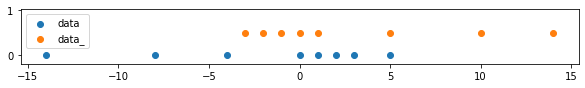

In [24]:
plt.figure(figsize=(10,1))
plt.scatter(data, zeros, label='data')
plt.scatter(data_, ones, label='data_')
plt.ylim(-0.2,1.02)
plt.legend()
plt.show()

In [31]:
# Python
n = len(data)
mean_ = sum(data) / n

var_ = sum((item - mean_)**2 for item in data)/ \
        (n - 1)
std_ = var_ ** 0.5


skew_ = (sum((item - mean_)**3 for item in data)* 
         n / ((n - 1) * (n - 2) * std_**3))
skew_

-1.0836532081173456

Vrijednost blizu nule govori da su podaci prilicno simetricni.Negativne vrijednosti da su distriburiani više lijevo, a pozitivna više desno. 

In [26]:
# SciPy
skew_ = scipy.stats.skew(data, bias=False) #parametar bias=False omogucava korekcije na statisticki bias/naklonost
skew_

-1.0836532081173458

In [188]:
skew_ = scipy.stats.skew(yy, bias=False)
skew_

nan

In [196]:
# Pandas skew()
xx_.skew()

0.2603584884947226

In [197]:
yy_.skew()

-0.11822384873423467

### 4. Percentili
Percentil (ili postotak) je mjera koja se koristi u statistici za pokazivanje vrijednosti ispod koje dati procenat opservacija u grupi opservacija spada. Na primer, 20. percentil je vrijednost (ili rezultat) ispod koga se može naći 20% opservacija.

Ostalih 80% opservacija je iznad te vrijednosti.

Svaki skup podataka ima tri kvartila, koji podatke dijele u cetiri skupine.

- Prvi kvartil je 25. percentil (on odvaja 25% najmanjih clanova skupa podataka)
- Drugi kvartil je 50. percentil ili medijan
- Treci kvartil je 75. percentil.

In [199]:
x = [71, 95, 62, 65, 85, 90, 73]

In [201]:
# Statistic library
statistics.quantiles(x, n=2)

[73.0]

73 je medijan, jer smo uzorak izdijelili u dva dijela.

In [205]:
statistics.quantiles(x, n=4)

[65.0, 73.0, 90.0]

In [206]:
statistics.quantiles(x, n=4, method='inclusive')

[68.0, 73.0, 87.5]

In [208]:
# NumPy
np.percentile(x,5)

62.900000000000006

In [209]:
np.percentile(x,95)

93.5

In [210]:
np.percentile(x,[5,95])

array([62.9, 93.5])

In [211]:
np.quantile(x,0.05)

62.900000000000006

In [213]:
# Pandas quantile()
xx_.quantile(0.05)

62.900000000000006

### 7. Raspon rezultata
Razlika izmedju najvece i najmanje vrijednosti

In [221]:
# NumPy

np.ptp(x)

33

## Sazetak deskriptivne statistike
Pandas biblioteka ima vrlo praktican metod describe() koji daje najvaznije statistike podataka.

In [226]:
statistika = xx_.describe()
statistika

count     7.000000
mean     77.285714
std      12.763415
min      62.000000
25%      68.000000
50%      73.000000
75%      87.500000
max      95.000000
dtype: float64

In [227]:
statistika['mean']

77.28571428571429